## TP3: Visión por Computadora I (CEIA)
### Nombre: Pablo Segovia

In [1]:
# Importamos las librerías
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en 
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

Nota: Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza
de la detección.

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos

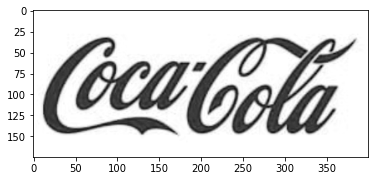

In [2]:
# Detección de logos
# Se debe hacer un detector usando el template
template = cv.imread('template/pattern.png',0)
h, w = template.shape
plt.figure()
plt.imshow(template, cmap='gray')
plt.show()

In [3]:
# Obtenemos los archivos de imagen
# Directorio actual
directorio_actual = os.getcwd()

# Listar archivos en el directorio actual
archivos_directorio_actual = os.listdir(directorio_actual)
print("Archivos en el directorio actual:", archivos_directorio_actual)

# Acceder a un subdirectorio dentro del directorio actual
nombre_subdirectorio = "images"
ruta_subdirectorio = os.path.join(directorio_actual, nombre_subdirectorio)

# Listar archivos en el directorio de imagenes
archivos_imagen = os.listdir(ruta_subdirectorio)
print("Archivos en el directorio actual:", archivos_imagen)

# Imagenes sin la multi
imagenes = ['COCA-COLA-LOGO.jpg','coca_logo_1.png', 'coca_logo_2.png','coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']
print(f'Imagenes singles: {imagenes}')

Archivos en el directorio actual: ['images', 'template', 'TP3_PabloSegovia.ipynb']
Archivos en el directorio actual: ['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']
Imagenes singles: ['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']


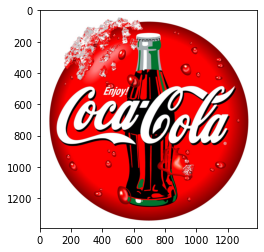

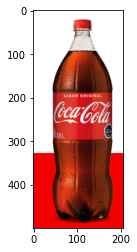

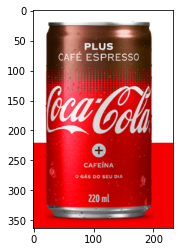

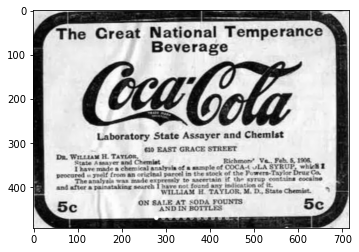

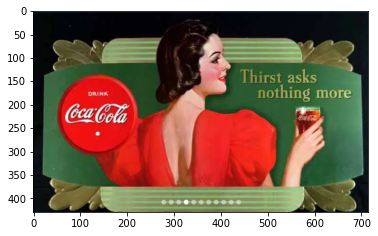

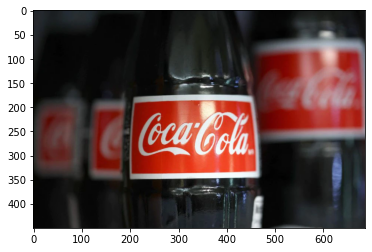

In [4]:
# Vemos cuales son las imagenes para mostrar
for img in imagenes:
    img = cv.imread(f'images/{img}')
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(img_rgb)
    plt.show()

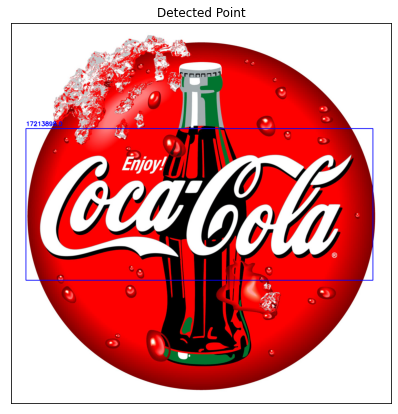

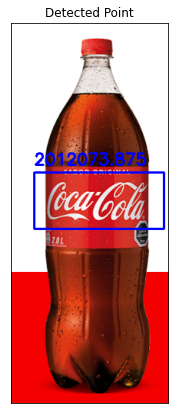

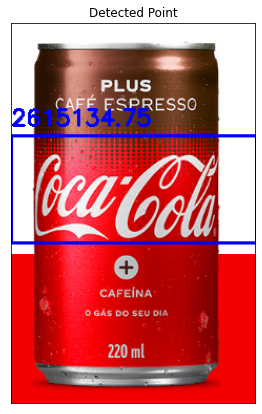

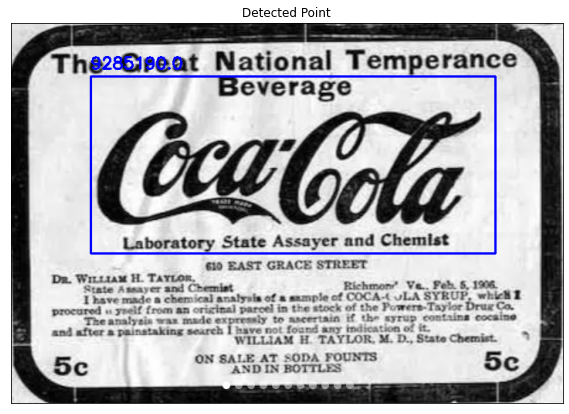

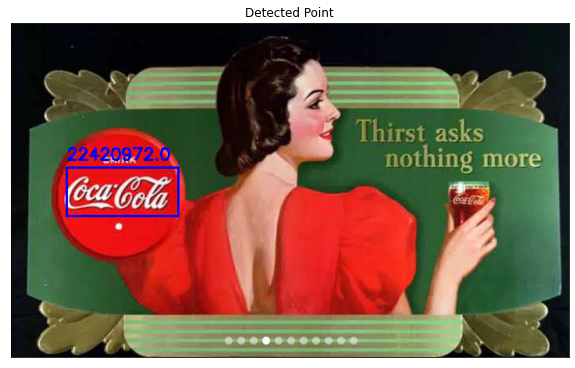

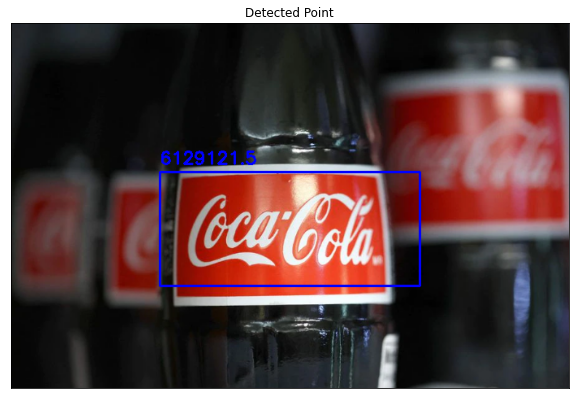

In [5]:
# Realizamos un algoritmo que me permita identificar los thresholds de Canny
for img in imagenes:
       img_orig = cv.imread(f'images/{img}')
       img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
       img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
       img_salida = img_rgb.copy()

       # Conocemos las dimensiones de la imagen
       img_h, img_w = img_gray.shape

       # Vemos el factor de escala
       escala = min(img_h/h,img_w/w)

       # Inicializamos el tamaño de la escala del template
       temp_resize = cv.resize(template, None, fx=escala, fy=escala)
       temp_resize_h, temp_resize_w = temp_resize.shape

       # Agregamos listas para guardar los coeficientes
       max_values = []
       max_locations = []
       heights = []
       widths = []

       # Iteramos con un linspace inverso para que el bounding box se achique
       for esc in np.linspace(0.2, 1, 10)[::-1]:
              temp_esc = cv.resize(temp_resize, (int(esc * temp_resize_w), int(esc * temp_resize_h)))
              temp_esc_h, temp_esc_w = temp_esc.shape
    
              # Hago los Canny
              temp_canny = cv.Canny(temp_esc, 50, 100)
              img_canny = cv.Canny(img_gray, 100, 200)
       
              # Aplicamos la coincidencia de patrones
              #--------------------------------------
              res = cv.matchTemplate(img_canny, temp_canny, cv.TM_CCOEFF)
    
              # Encontramos los valores máximos y mínimos
              min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

              # Agregamos la copia de la imagen
              img_salida = img_rgb.copy()

              # Guardamos los valores
              max_values.append(max_val)
              max_locations.append(max_loc)
              heights.append(temp_esc_h)
              widths.append(temp_esc_w)
    
       # Elegimos los valores para graficar
       id = max_values.index(max(max_values))
       max_loc = max_locations[id]
       temp_esc_h = heights[id]
       temp_esc_w = widths[id]

       # Marcamos el lugar donde lo haya encontrado
       #----------------------------------------
       top_left = max_loc
       bottom_right = (top_left[0] + temp_esc_w, top_left[1] + temp_esc_h)
       cv.rectangle(img_salida,top_left, bottom_right, (0,0,255), 2)
       cv.putText(img_salida, str(round(max_val, 3)),
                     (top_left[0], top_left[1] - 10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    
       # Graficamos el procesamiento y la salida
       #----------------------------------------
       plt.figure(figsize=(10,7))
    
       # Imagen original con recuadros
       plt.imshow(img_salida)
       plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
       plt.show()


2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

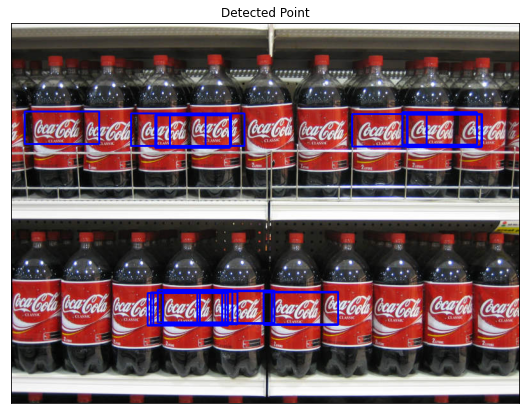

In [70]:
# Inicializamos la imagen de la misma manera anterior
img_orig = cv.imread('images\coca_multi.png')
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
img_rgb = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_h, img_w = img_gray.shape
img_salida = img_rgb.copy()

# Vemos el factor de escala y escalamos
escala = min(h/img_h,w/img_w)
temp_esc = cv.resize(template, (int(escala * w), int(escala * h)))
temp_esc_h, temp_esc_w = temp_esc.shape

# Definimos los Canny
temp_canny = cv.Canny(temp_esc, 50, 100)
img_canny = cv.Canny(img_gray, 100, 200)

# Calculamos el match template, elegimos un threshold y normalizamos
res = cv.matchTemplate(img_canny, temp_canny, cv.TM_CCOEFF)
res_norm = res / np.max(res)
threshold = 0.9
loc = np.where( res_norm >= threshold)

# Graficamos los rectangulos
for pt in zip(*loc[::-1]):
    cv.rectangle(img_salida, pt, (pt[0] + temp_esc_w, pt[1] + temp_esc_h), (0,0,255), 2)
    
# Graficamos el procesamiento y la salida
#----------------------------------------
plt.figure(figsize=(10,7))
    
# Imagen original con recuadros
plt.imshow(img_salida)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    
plt.show()

3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes.